In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-white")

C:\Users\spokh\AppData\Local\Temp\ipykernel_11412\3758927155.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


In [2]:
df = pd.read_csv("../../datasets/housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing = df.copy()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

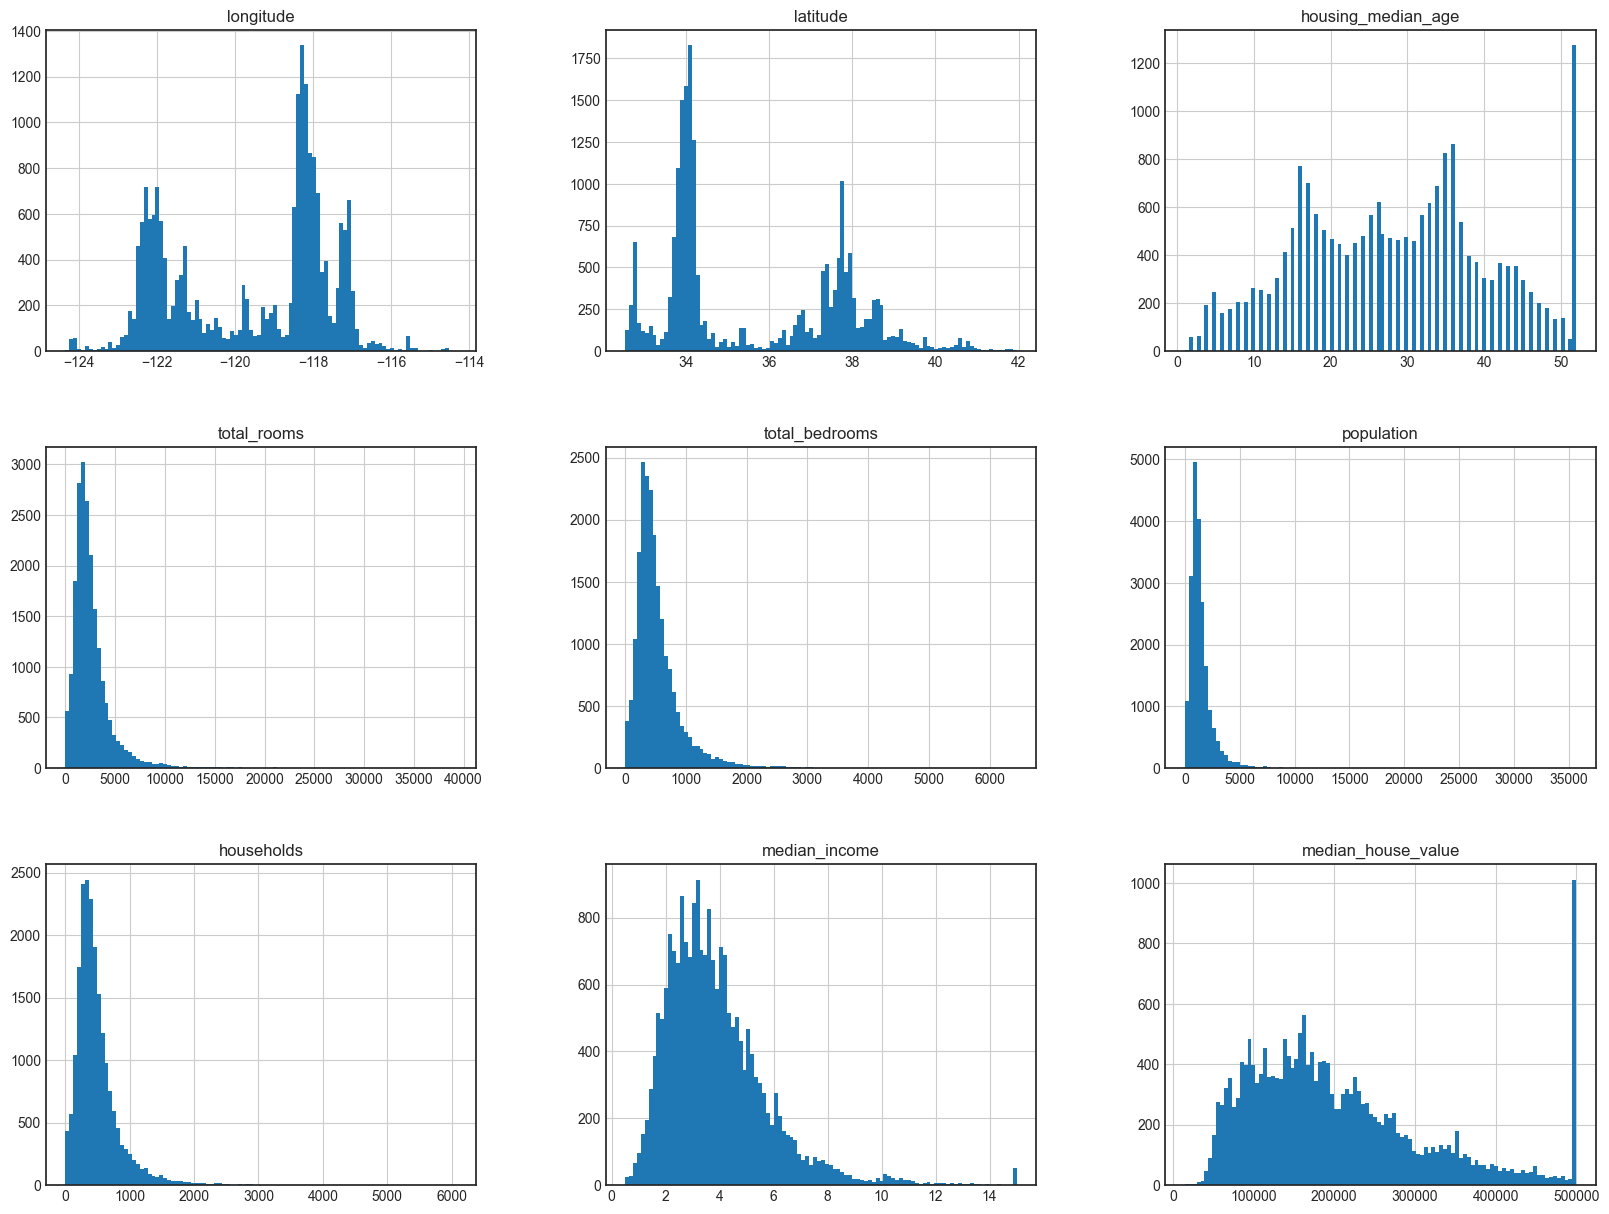

In [7]:
housing.hist(bins=100,figsize=(20,15))
plt.show()

## Creating a Test Set (Using Random Sampling Method)

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing,test_size=0.2, random_state=42)

Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, you first need to create
an income category attribute. 

In [9]:
housing['income_cat'] = pd.cut(housing["median_income"],bins=[0. ,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot: >

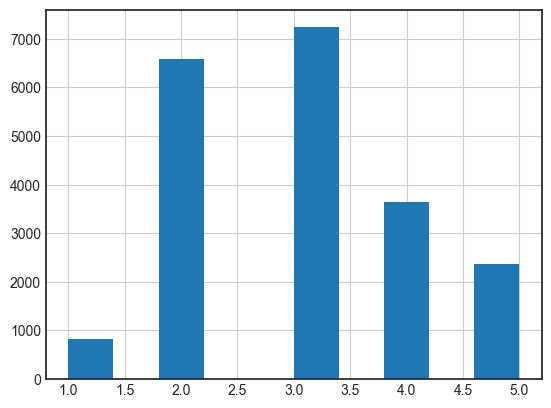

In [10]:
housing["income_cat"].hist()

## Now that the data is ready for stratified sampling, useing sklearns inbuilt methods

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split  = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]    

In [12]:
strat_test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
17352    -120.42     34.89                24.0       2020.0           307.0   
3505     -118.45     34.25                36.0       1453.0           270.0   
7777     -118.10     33.91                35.0       1653.0           325.0   
14155    -117.07     32.77                38.0       3779.0           614.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
17352       855.0       283.0         5.0099            162500.0   
3505        808.0       275.0         4.3839            204600.0   
7777       1072.0       301.0         3.2708            159700.0   
14155      1495.0       614.0         4.3529            184000.0   

      ocean_proximity income_cat  
5241        <1H OCEAN          5  
17352       <1H OCEAN          4  
3505        <1H OCEAN          3  
7777        <1H OCEAN          3  
14155      NEAR OCEAN          3

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

## Removing income_cat attr so that data is back to its original state

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

## Data Viz for some more insights

In [15]:
housing = strat_train_set.copy()

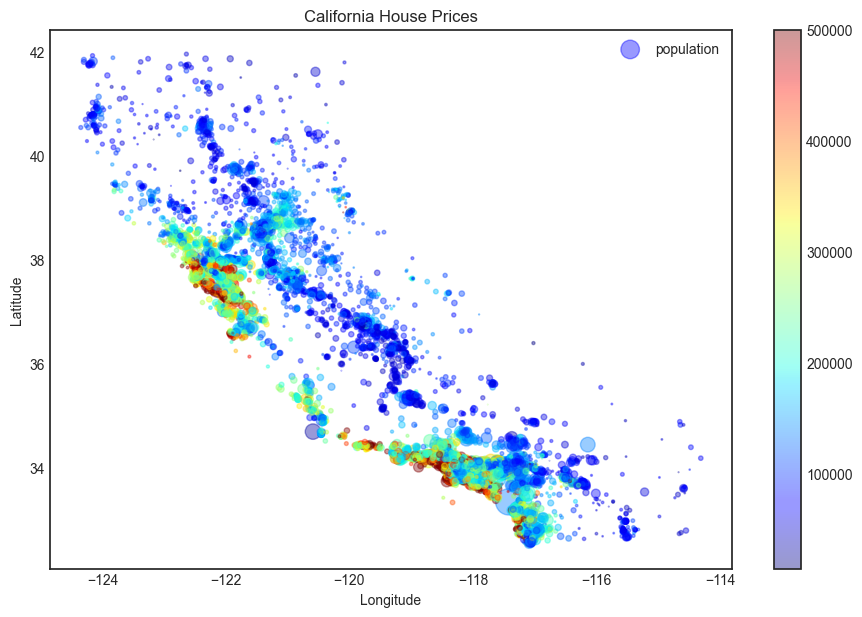

In [16]:
fig, ax = plt.subplots()
fig.set(size_inches=(11,7))

plot = ax.scatter(
        housing.longitude, 
        housing.latitude,
        alpha=0.4,
        s=housing.population/100, 
        label="population", 
        c= housing.median_house_value,
        cmap=plt.get_cmap("jet")
)
ax.legend()
ax.set_title("California House Prices")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.colorbar(plot)

In [17]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values()

C:\Users\spokh\AppData\Local\Temp\ipykernel_11412\3298527808.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

## Experimenting with Attribute combination

In [18]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
12655          INLAND             5.485836           0.205784   
15502      NEAR OCEAN             6.927083           0.160714   
2908           INLAND             5.393333           0.191595   
14053      NEAR OCEAN             3.886128           0.276505   
20496       <1H OCEAN             6.096552           0.182692   

       population_per_household  
12655                  3.168555  
15502                  2.623698  
2908                   2.223333  
14053                  1.859213  
20496                  3.167241

In [19]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=True)

C:\Users\spokh\AppData\Local\Temp\ipykernel_11412\1929191059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


bedrooms_per_room          -0.259952
latitude                   -0.142673
longitude                  -0.047466
population                 -0.026882
population_per_household   -0.021991
total_bedrooms              0.047781
households                  0.064590
housing_median_age          0.114146
total_rooms                 0.135140
rooms_per_household         0.146255
median_income               0.687151
median_house_value          1.000000
Name: median_house_value, dtype: float64

## Preparing Data for Machine Learning Algorithm

In [20]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

1. Missing values

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [22]:
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [23]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [24]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

In [25]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [26]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

* One issue with this representation is that ML algorithms will assume that two nearb values are more similar than two distant values. 

In [27]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [29]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix,households_ix = 3,4,5,6

In [32]:
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y= None):
        return self
    
    def transform(self,X,y=None):
        rooms_per_household = X[:,bedrooms_ix] / X[:,households_ix]
        population_per_household = X[:, population_ix] / X[:,households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [34]:
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

### Creating your own Data Pipeline For executing various NUMERICAL data transformations

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

## Creating Custom Pipeline that handels NUMERICAL as well as CATEGORICAL columns all in one

In [37]:
from sklearn.compose import ColumnTransformer

In [40]:
num_attribs = list(housing_num)  # return column names only
cat_attribs =["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num",num_pipeline,num_attribs),
        ("cat",OneHotEncoder(),cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model

### 1. LInear Reg Model

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg  = LinearRegression()

In [45]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

* Lets try out the model on few training set instances

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions : ", lin_reg.predict(some_data_prepared))
print("Original Labels : ", list(some_labels))

Predictions :  [ 86327.32120462 306269.39222521 151686.37104253 186320.19298729
 244575.9553263 ]
Original Labels :  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


# Lets Measure the RMSE of the Model

In [47]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse =np.sqrt(lin_mse)
lin_rmse

68789.58126449553

* so clearly the model is not working well for the dataset, i.e the model is underfitted

### Lets try a bit complex model
### 2. DecisionTreeREgressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

* Yes , now the model has clearly overfitted, how do we knoe ? lets test it with the testing data

## Using Cross Validation
* A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The follow‐
ing code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array con‐
taining the 10 evaluation scores

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels, scoring="neg_mean_squared_error", cv =10)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scoers(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [53]:
display_scoers(tree_rmse_scores)

Scores: [73573.98532352 72256.98281256 68054.4980312  71390.42552565
 68652.64999242 75941.18124665 73913.53156028 73289.44197544
 70831.8777027  72009.90135865]
Mean: 71991.44755290647
Standard deviation: 2278.329177653341


### Let’s compute the same scores for the Linear Regression model just to be sure:

In [55]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scoers(lin_rmse_scores)

Scores: [71801.99837884 65015.07583697 67659.2906864  68787.80884719
 67026.6711897  72547.86158248 75116.24236759 68966.54738073
 66561.96285809 70397.64938435]
Mean: 69388.11085123301
Standard deviation: 2930.1088513275786


#### That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

### 3. RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [57]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scoers(forest_rmse_scores)

Scores: [51638.75006297 49915.66022873 47091.37357575 52767.48350718
 47986.05669009 51895.20509499 52652.05399836 49879.46441097
 48380.78976855 54867.67626323]
Mean: 50707.45136008144
Standard deviation: 2341.3375783690058


## Saving your model

In [59]:
import joblib

In [61]:
joblib.dump(forest_reg,"random_forest.pkl")
# my_model_loaded = joblib.load("random_forest.pkl"

['random_forest.pkl']

## Fine Tuning our Model
### 1. Grid Search
=> to fiddle with the hyperparameters , until you
find a great combination of hyperparameter values

In [64]:
from sklearn.model_selection import GridSearchCV

In [62]:
# paramters to experiment with for RandomForestREgressor
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [63]:
forest_reg = RandomForestRegressor()

In [65]:
grid_search = GridSearchCV(forest_reg, param_grid,cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [67]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [68]:
# for evaluation scoers
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

63684.76235560766 {'max_features': 2, 'n_estimators': 3}
55443.45205827617 {'max_features': 2, 'n_estimators': 10}
52920.357723244146 {'max_features': 2, 'n_estimators': 30}
60875.63114120017 {'max_features': 4, 'n_estimators': 3}
52800.75962600959 {'max_features': 4, 'n_estimators': 10}
50610.56092614971 {'max_features': 4, 'n_estimators': 30}
59104.14859067927 {'max_features': 6, 'n_estimators': 3}
52235.02368034676 {'max_features': 6, 'n_estimators': 10}
49831.42985776232 {'max_features': 6, 'n_estimators': 30}
59258.17969576203 {'max_features': 8, 'n_estimators': 3}
52220.26174664475 {'max_features': 8, 'n_estimators': 10}
50231.39081527094 {'max_features': 8, 'n_estimators': 30}
63209.607185457375 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54140.97280879003 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59604.77126673371 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52184.29343425489 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

### 2. Randomized Search
* The grid search approach is fine when you are exploring relatively few combinations,
like in the previous example, but when the hyperparameter search space is large, it is
often preferable to use RandomizedSearchCV instead

### 3. Ensemble Method
*  to try to combine the models that perform
best. The group (or “ensemble”) will often perform better than the best individual
model (just like Random Forests perform better than the individual Decision Trees
they rely on), especially if the individual models make very different types of errors

## Evaluating The Model On Test

In [69]:
final_model = grid_search.best_estimator_

In [70]:
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [71]:
final_rmse

47747.373438632945